In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import re

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [21]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

## ML preeliminary testing

In [3]:
df = pd.read_csv('datasets/train.csv')
df

,number,price,num_digits,unique_digits,num_zeros,max_group,max_group_second,shan_entrop,lv_dist,num_ones,...,15,16,17,18,19,20,21,22,23,24
0,0.012519,109000,0.666667,0.25,0.00,0.25,0.25,0.430677,0.141237,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.031622,72000,0.666667,0.25,0.00,0.50,0.00,0.349398,0.532474,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.299923,24000,1.000000,0.25,0.50,0.50,0.25,0.418166,0.785567,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.077085,17500,0.666667,0.50,0.00,0.25,0.00,0.646015,0.229897,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.088203,17500,0.666667,0.50,0.00,0.25,0.00,0.646015,0.286082,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,0.071531,9200,0.666667,0.75,0.25,0.00,0.00,0.861353,0.250515,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3836,0.062955,15000,0.666667,0.50,0.00,0.25,0.00,0.646015,0.114433,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3837,0.911837,6500,1.000000,0.50,0.00,0.50,0.00,0.590436,0.618041,0.6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3838,0.086481,6600,0.666667,0.75,0.25,0.00,0.00,0.861353,0.208247,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
## Sets targets and set up test train_split
X = df[[col for col in df.columns if col != 'price']]
y = df['price']

# Set up the split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

In [51]:
def regression_eval_nonnn(model,
         train_input,
         train_output,
         test_input,
         test_output):
    
    """
    Testing and evaluating function for regression models for non NN models
    """
    model.fit(train_input, train_output)
    y_pred = model.predict(test_input)
    
     # extract line of best fit statistics
    slope, intercept, r_value, p_value, std_err = stats.linregress(test_output,y_pred)
    
    MAE = mean_absolute_error(test_output, y_pred)
    MSE = mean_squared_error(test_output, y_pred, squared = 1)
    RMSE = mean_squared_error(test_output, y_pred, squared = 0)
    N_RMSE = (mean_squared_error(test_output, y_pred, squared = 0))/(test_output.max() - test_output.min())
    R2 = r2_score(val_y, y_pred)
    
    # Extract name from model __class__
    model_name = re.findall(r'(?<=\.)[a-zA-Z]+(?=\')',str(model.__class__))[0]

    print('---------------')
    print(f'{model_name} Results: ')
    print('---------------')
    print(f'MAE = {MAE:.2f} AED.')
    print(f'MSE = {MSE:.2f} AED.')
    print(f'RMSE = {RMSE:.2f} AED.')
    print(f'N-RMSE = {N_RMSE:.2f} AED.')
    print(f'R^2 = {R2:.2f}')
    
    print('\nRegression Line Metrics: ')
    print('---------------------------')
    print(f'r = {r_value:.2f}, p = {p_value:.2f}, err = {std_err:.2f}')
    
    # plot A vs. P plot with regression line
    sns.regplot(x = test_output, y = y_pred, line_kws = {'label': f' y = {slope:.1f} x + {intercept:.1f}'})
    plt.legend()
    plt.title(f'{model_name}')
    plt.xlabel('Actual Price (AED)')
    plt.ylabel('Predicted Price (AED)')
    plt.show()
    
    return (model_name,MAE,MSE,RMSE,N_RMSE,R2)

In [16]:
# Will iterate and inspect initial results from these models
models = [RandomForestRegressor(),
          XGBRegressor(),
          LinearRegression(),
          DecisionTreeRegressor(),
          KNeighborsRegressor()]

In [29]:
# This gives context to Metrics
y.describe()

count    3.840000e+03
mean     1.289900e+04
std      8.745635e+04
min      1.000000e+00
25%      2.400000e+03
50%      2.600000e+03
75%      3.000000e+03
max      2.990000e+06
Name: price, dtype: float64

<IPython.core.display.Javascript object>

---------------
RandomForestRegressor Results: 
---------------
MAE = 4705.24 AED.
MSE = 1176789730.66 AED.
RMSE = 34304.37 AED.
N-RMSE = 0.02 AED.
R^2 = 0.73

Regression Line Metrics: 
---------------------------
r = 0.91, p = 0.00, err = 0.02


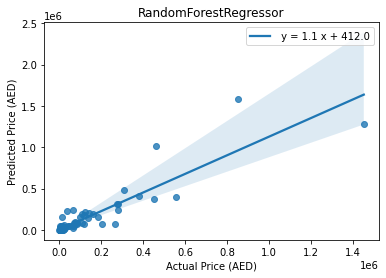

________________________________________________


<IPython.core.display.Javascript object>

---------------
XGBRegressor Results: 
---------------
MAE = 7249.50 AED.
MSE = 7034894896.93 AED.
RMSE = 83874.28 AED.
N-RMSE = 0.06 AED.
R^2 = -0.59

Regression Line Metrics: 
---------------------------
r = 0.82, p = 0.00, err = 0.04


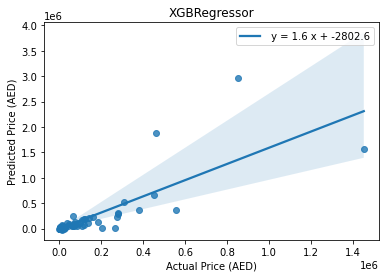

________________________________________________


<IPython.core.display.Javascript object>

---------------
LinearRegression Results: 
---------------
MAE = 19106.09 AED.
MSE = 4591001814.94 AED.
RMSE = 67756.93 AED.
N-RMSE = 0.05 AED.
R^2 = -0.04

Regression Line Metrics: 
---------------------------
r = 0.88, p = 0.00, err = 0.03


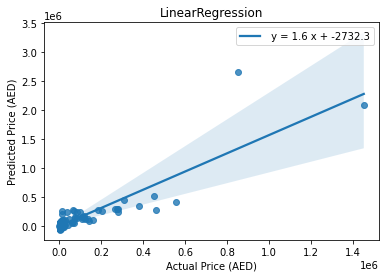

________________________________________________


<IPython.core.display.Javascript object>

---------------
DecisionTreeRegressor Results: 
---------------
MAE = 8058.86 AED.
MSE = 7337286446.13 AED.
RMSE = 85657.96 AED.
N-RMSE = 0.06 AED.
R^2 = -0.66

Regression Line Metrics: 
---------------------------
r = 0.81, p = 0.00, err = 0.04


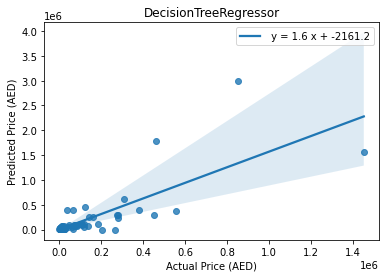

________________________________________________


<IPython.core.display.Javascript object>

---------------
KNeighborsRegressor Results: 
---------------
MAE = 7841.46 AED.
MSE = 1994835714.46 AED.
RMSE = 44663.58 AED.
N-RMSE = 0.03 AED.
R^2 = 0.55

Regression Line Metrics: 
---------------------------
r = 0.77, p = 0.00, err = 0.02


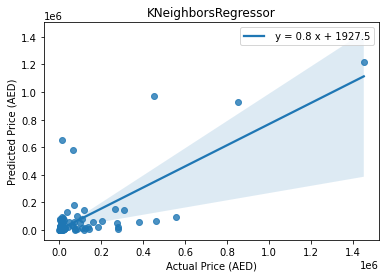

________________________________________________


In [52]:
for model in models:
    regression_eval_nonnn(model,
                          train_X,
                          train_y,
                          val_X,
                          val_y)
    print('________________________________________________')

### Test model performance with outliers removed

In [34]:
df_noout

,number,price,num_digits,unique_digits,num_zeros,max_group,max_group_second,shan_entrop,lv_dist,num_ones,...,15,16,17,18,19,20,21,22,23,24
0,0.012519,109000,0.666667,0.25,0.00,0.25,0.25,0.430677,0.141237,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.031622,72000,0.666667,0.25,0.00,0.50,0.00,0.349398,0.532474,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.299923,24000,1.000000,0.25,0.50,0.50,0.25,0.418166,0.785567,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.077085,17500,0.666667,0.50,0.00,0.25,0.00,0.646015,0.229897,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.088203,17500,0.666667,0.50,0.00,0.25,0.00,0.646015,0.286082,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,0.071531,9200,0.666667,0.75,0.25,0.00,0.00,0.861353,0.250515,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3836,0.062955,15000,0.666667,0.50,0.00,0.25,0.00,0.646015,0.114433,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3837,0.911837,6500,1.000000,0.50,0.00,0.50,0.00,0.590436,0.618041,0.6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3838,0.086481,6600,0.666667,0.75,0.25,0.00,0.00,0.861353,0.208247,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
